In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=97824ff516658256d2b4f5c605b47aa0


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [5]:
cities

['marcona',
 'dire',
 'lebu',
 'albany',
 'butaritari',
 'palabuhanratu',
 'ughelli',
 'vaini',
 'beloha',
 'rikitea',
 'bur gabo',
 'castro',
 'tabiauea',
 'qaanaaq',
 'kirakira',
 'beringovskiy',
 'katherine',
 'guerrero negro',
 'saldanha',
 'norman wells',
 'solnechnyy',
 'kruisfontein',
 'henties bay',
 'camacha',
 'jalu',
 'ushuaia',
 'abu dhabi',
 'tabas',
 'chanika',
 'tilichiki',
 'nizhniy kuranakh',
 'sao joao da barra',
 'busselton',
 'broken hill',
 'bengkulu',
 'cherskiy',
 'dikson',
 'farafangana',
 'olafsvik',
 'yellowknife',
 'zhicheng',
 'punta arenas',
 'koslan',
 'jamestown',
 'victoria',
 'kieta',
 'padang',
 'lompoc',
 'lappeenranta',
 'praia',
 'nikolskoye',
 'vikulovo',
 'yaan',
 'port alfred',
 'cape town',
 'warqla',
 'port elizabeth',
 'georgetown',
 'cap malheureux',
 'ostrovnoy',
 'mehamn',
 'launceston',
 'larreynaga',
 'kapaa',
 'mataura',
 'tuktoyaktuk',
 'kimberley',
 'nome',
 'kamyaran',
 'rawson',
 'hobart',
 'los llanos de aridane',
 'north bend',
 'k

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marcona
City not found. Skipping...
Processing Record 2 of Set 1 | dire
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 7 of Set 1 | ughelli
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | beloha
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | bur gabo
City not found. Skipping...
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | kirakira
Processing Record 16 of Set 1 | beringovskiy
Processing Record 17 of Set 1 | katherine
Processing Record 18 of Set 1 | guerrero negro
Processing Record 19 of Set 1 | saldanha
Processing Record 20 of Set 1 | norman wells
Processing Recor

Processing Record 38 of Set 4 | jasper
Processing Record 39 of Set 4 | fairbanks
Processing Record 40 of Set 4 | chuy
Processing Record 41 of Set 4 | alihe
Processing Record 42 of Set 4 | mahebourg
Processing Record 43 of Set 4 | blagoveshchensk
Processing Record 44 of Set 4 | saleaula
City not found. Skipping...
Processing Record 45 of Set 4 | winfield
Processing Record 46 of Set 4 | port macquarie
Processing Record 47 of Set 4 | tura
Processing Record 48 of Set 4 | belmonte
Processing Record 49 of Set 4 | puerto leguizamo
Processing Record 50 of Set 4 | kavieng
Processing Record 1 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 5 | sept-iles
Processing Record 3 of Set 5 | kosh-agach
Processing Record 4 of Set 5 | fare
Processing Record 5 of Set 5 | tecoanapa
Processing Record 6 of Set 5 | caravelas
Processing Record 7 of Set 5 | mar del plata
Processing Record 8 of Set 5 | tual
Processing Record 9 of Set 5 | ilinskiy
Processing Record 10 of Set 5 | coq

Processing Record 28 of Set 8 | isangel
Processing Record 29 of Set 8 | waingapu
Processing Record 30 of Set 8 | mavrovi anovi
Processing Record 31 of Set 8 | ituni
City not found. Skipping...
Processing Record 32 of Set 8 | aswan
Processing Record 33 of Set 8 | los banos
Processing Record 34 of Set 8 | bonavista
Processing Record 35 of Set 8 | olga
Processing Record 36 of Set 8 | te anau
Processing Record 37 of Set 8 | bondo
Processing Record 38 of Set 8 | ginir
Processing Record 39 of Set 8 | bacesti
Processing Record 40 of Set 8 | hasaki
Processing Record 41 of Set 8 | fortuna
Processing Record 42 of Set 8 | tateyama
Processing Record 43 of Set 8 | masvingo
Processing Record 44 of Set 8 | pizarro
Processing Record 45 of Set 8 | chinsali
Processing Record 46 of Set 8 | davila
Processing Record 47 of Set 8 | asau
Processing Record 48 of Set 8 | port blair
Processing Record 49 of Set 8 | qandala
Processing Record 50 of Set 8 | yeppoon
Processing Record 1 of Set 9 | preobrazhenskaya
Cit

Processing Record 14 of Set 12 | lolua
City not found. Skipping...
Processing Record 15 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 16 of Set 12 | nhulunbuy
Processing Record 17 of Set 12 | banmankhi
Processing Record 18 of Set 12 | sarkand
Processing Record 19 of Set 12 | zima
Processing Record 20 of Set 12 | magadan
Processing Record 21 of Set 12 | kharan
Processing Record 22 of Set 12 | nongstoin
Processing Record 23 of Set 12 | quatre cocos
Processing Record 24 of Set 12 | katsuura
Processing Record 25 of Set 12 | kabalo
Processing Record 26 of Set 12 | lata
Processing Record 27 of Set 12 | bafra
Processing Record 28 of Set 12 | tuensang
Processing Record 29 of Set 12 | panalingaan
Processing Record 30 of Set 12 | mpulungu
Processing Record 31 of Set 12 | mana
Processing Record 32 of Set 12 | ternate
Processing Record 33 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 34 of Set 12 | attawapiskat
City not found. Skipping...
Processing R

In [39]:
len(city_data)

562

In [40]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dire,12.2833,-10.9667,73.72,92,46,3.27,ML,2021-10-02 00:28:04
1,Lebu,-37.6167,-73.6500,46.80,87,100,16.60,CL,2021-10-02 00:28:04
2,Albany,42.6001,-73.9662,53.92,80,14,5.95,US,2021-10-02 00:28:05
3,Butaritari,3.0707,172.7902,82.20,77,93,16.58,KI,2021-10-02 00:28:05
4,Ughelli,5.4899,6.0074,74.28,96,95,2.73,NG,2021-10-02 00:28:06
5,Vaini,-21.2000,-175.2000,77.16,88,75,13.80,TO,2021-10-02 00:28:06
6,Beloha,-25.1667,45.0500,71.24,58,0,2.04,MG,2021-10-02 00:28:07
7,Rikitea,-23.1203,-134.9692,73.06,73,14,20.87,PF,2021-10-02 00:25:09
8,Castro,-24.7911,-50.0119,56.71,93,100,2.48,BR,2021-10-02 00:25:01
9,Qaanaaq,77.4840,-69.3632,28.09,93,100,5.03,GL,2021-10-02 00:28:08


In [41]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df [new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dire,ML,2021-10-02 00:28:04,12.2833,-10.9667,73.72,92,46,3.27
1,Lebu,CL,2021-10-02 00:28:04,-37.6167,-73.6500,46.80,87,100,16.60
2,Albany,US,2021-10-02 00:28:05,42.6001,-73.9662,53.92,80,14,5.95
3,Butaritari,KI,2021-10-02 00:28:05,3.0707,172.7902,82.20,77,93,16.58
4,Ughelli,NG,2021-10-02 00:28:06,5.4899,6.0074,74.28,96,95,2.73
5,Vaini,TO,2021-10-02 00:28:06,-21.2000,-175.2000,77.16,88,75,13.80
6,Beloha,MG,2021-10-02 00:28:07,-25.1667,45.0500,71.24,58,0,2.04
7,Rikitea,PF,2021-10-02 00:25:09,-23.1203,-134.9692,73.06,73,14,20.87
8,Castro,BR,2021-10-02 00:25:01,-24.7911,-50.0119,56.71,93,100,2.48
9,Qaanaaq,GL,2021-10-02 00:28:08,77.4840,-69.3632,28.09,93,100,5.03


In [42]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [43]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

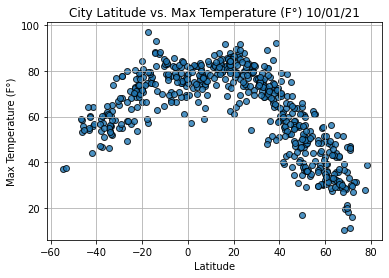

In [44]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature (F\N{DEGREE SIGN}) "+ time.strftime("%x"))
plt.ylabel(f"Max Temperature (F\N{DEGREE SIGN})")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

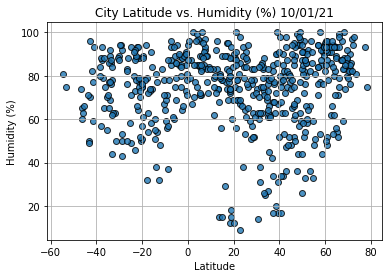

In [45]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

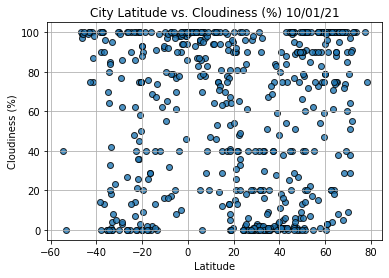

In [46]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

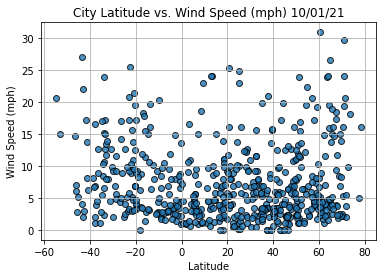

In [47]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [59]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print (r_value)

In [60]:
index13 = city_data_df.loc[13]
index13

City               Guerrero Negro
Country                        MX
Date          2021-10-02 00:24:40
Lat                       27.9769
Lng                      -114.061
Max Temp                    79.23
Humidity                       57
Cloudiness                      0
Wind Speed                  12.37
Name: 13, dtype: object

In [61]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
557     True
558    False
559    False
560     True
561     True
Name: Lat, Length: 562, dtype: bool

In [62]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dire,ML,2021-10-02 00:28:04,12.2833,-10.9667,73.72,92,46,3.27
2,Albany,US,2021-10-02 00:28:05,42.6001,-73.9662,53.92,80,14,5.95
3,Butaritari,KI,2021-10-02 00:28:05,3.0707,172.7902,82.20,77,93,16.58
4,Ughelli,NG,2021-10-02 00:28:06,5.4899,6.0074,74.28,96,95,2.73
9,Qaanaaq,GL,2021-10-02 00:28:08,77.4840,-69.3632,28.09,93,100,5.03


In [63]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

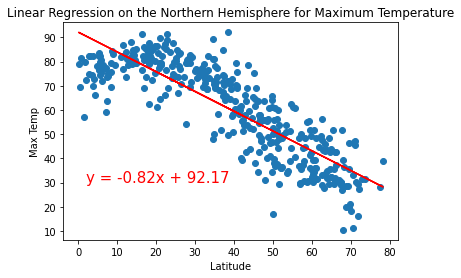

-0.8477642888358253


In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(2,30))

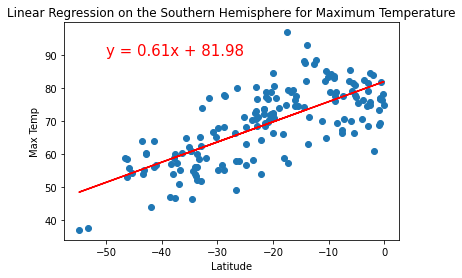

0.7253266720563804


In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

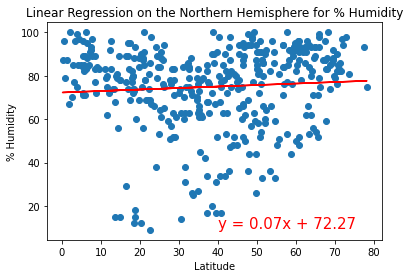

0.07101493933924953


In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity', (40,10))

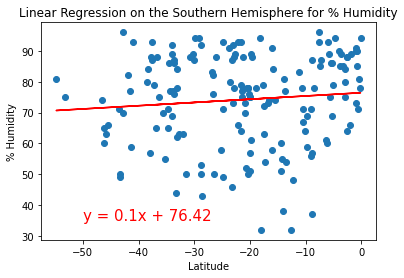

0.09421444832454408


In [94]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity', (-50,35))

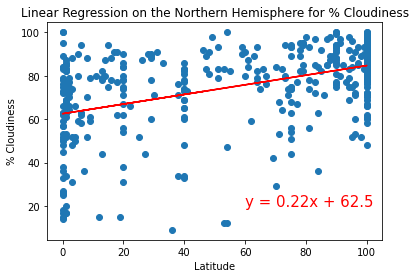

0.45589070103313


In [98]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Cloudiness"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (60,20))

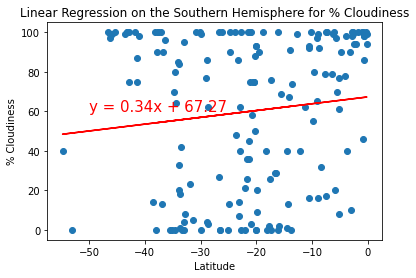

0.11766758810007365


In [100]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

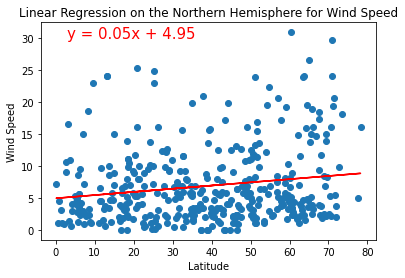

0.16852466229167914


In [107]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(3,30))

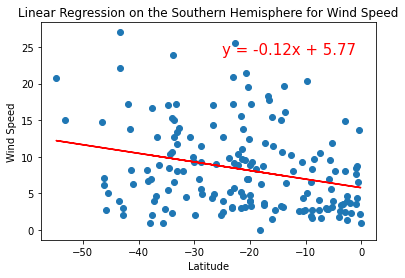

-0.27203371844727015


In [120]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-25,24))